# Imports y Preparacion del dataset

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn.preprocessing as skp
import scipy.stats as stats
import scipy as sc
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
#joblib
#from joblib import dump, load
import joblib

# multivariado   
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import DistanceMetric

from sklearn import metrics

from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score#, precision_recall_curve, roc_curve, 
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#
from sklearn.model_selection import GridSearchCV, StratifiedKFold,KFold
from sklearn.metrics import make_scorer

from sklearn.model_selection import train_test_split

###
import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasetss/hotels_train_processed.csv') 
df_test= pd.read_csv('/content/drive/MyDrive/Datasetss/hotels_test_processed_with_id .csv')


In [ ]:
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'days_in_waiting_list',
       'average_daily_rate', 'required_car_parking_spaces',
       'total_of_special_requests', 'assigned_equals_reserved',
       'temporada_alta', 'hotel_Resort Hotel', 'meal_FB', 'meal_HB', 'meal_SC',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'country_BEL', 'country_BRA',
       'country_CHE', 'country_CHN', 'country_CN', 'country_DEU',
       'country_ESP', 'country_FRA', 'country_GBR', 'country_IRL',
       'country_ISR', 'country_ITA', 'country_NLD', 'country_NOR',
       'country_OTHER', 'country_POL', 'country_PRT', 'country_RUS',
       'country_SWE', 'country_USA', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA']

features_without_dummies = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'days_in_waiting_list',
       'average_daily_rate','required_car_parking_spaces','total_of_special_requests']

# Checkpoint 4

## Preparacion

In [ ]:
colummas_predictoras = df[features]
target = df['is_canceled']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(colummas_predictoras,target,test_size=0.2, random_state=22)

In [ ]:
sscaler=StandardScaler() #NORMALIZO
sscaler.fit(pd.DataFrame(x_train[features_without_dummies]))
x_train_transform_1=sscaler.transform(pd.DataFrame(x_train[features_without_dummies]))
x_test_transform_1=sscaler.transform(pd.DataFrame(x_test[features_without_dummies]))


In [ ]:
x_train['lead_time'] = x_train_transform_1[:,0]

x_train['stays_in_weekend_nights'] = x_train_transform_1[:,1]
x_train['stays_in_week_nights'] = x_train_transform_1[:,2]
x_train['adults'] = x_train_transform_1[:,3]
x_train['children'] = x_train_transform_1[:,4]
x_train['babies'] = x_train_transform_1[:,5]
x_train['previous_cancellations'] = x_train_transform_1[:,6]
x_train['previous_bookings_not_canceled'] = x_train_transform_1[:,7]
x_train['booking_changes'] = x_train_transform_1[:,8]
x_train['agent'] = x_train_transform_1[:,9]
x_train['days_in_waiting_list'] = x_train_transform_1[:,10]
x_train['average_daily_rate'] = x_train_transform_1[:,11]
x_train['required_car_parking_spaces'] = x_train_transform_1[:,12]
x_train['total_of_special_requests'] = x_train_transform_1[:,13]


x_test['lead_time'] = x_test_transform_1[:,0]
x_test['stays_in_weekend_nights'] = x_test_transform_1[:,1]
x_test['stays_in_week_nights'] = x_test_transform_1[:,2]
x_test['adults'] = x_test_transform_1[:,3]
x_test['children'] = x_test_transform_1[:,4]
x_test['babies'] = x_test_transform_1[:,5]
x_test['previous_cancellations'] = x_test_transform_1[:,6]
x_test['previous_bookings_not_canceled'] = x_test_transform_1[:,7]
x_test['booking_changes'] = x_test_transform_1[:,8]
x_test['agent'] = x_test_transform_1[:,9]
x_test['days_in_waiting_list'] = x_test_transform_1[:,10]
x_test['average_daily_rate'] = x_test_transform_1[:,11]
x_test['required_car_parking_spaces'] = x_test_transform_1[:,12]
x_test['total_of_special_requests'] = x_test_transform_1[:,13]


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred): 
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# SGD (Modelo 1)

Tomamos nuestro primer modelo usando SGD como parametro dado que no es el mejor optimizador, esperamos que los otros modelos sean mejores que este

In [ ]:
# calcula la cantidad de clases
cant_clases=len(np.unique(y_train))
d_in=len(x_train.columns)

modelo_hotels_1 = keras.Sequential([
    keras.layers.Dense(1,input_shape=(d_in,)),
    keras.layers.Dense(1, activation='sigmoid')])

modelo_hotels_1.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 1)                 56        
                                                                 
 dense_109 (Dense)           (None, 1)                 2         
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


In [ ]:

modelo_hotels_1.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=[f1_m])


cant_epochs_hotels=100
modelo_hotels1_historia = modelo_hotels_1.fit(x_train,y_train,epochs=cant_epochs_hotels,batch_size=50,verbose=False)


382/382 [==============================] - 1s 1ms/step


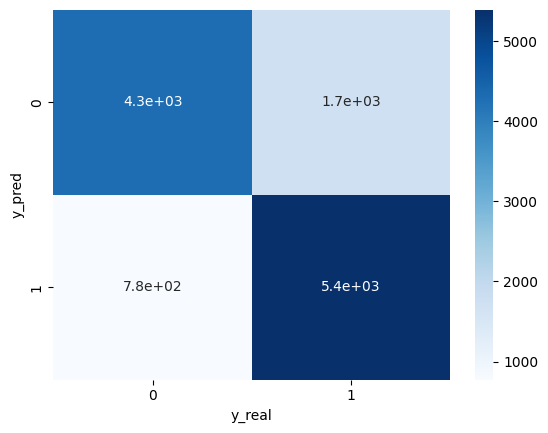

In [ ]:
y_predic_1 = modelo_hotels_1.predict(x_test)
y_predic_cat_1 = np.where(y_predic_1>0.4,1,0)

ds_validacion=pd.DataFrame(y_predic_cat_1, y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
plt.show()

In [ ]:
y_predic_cat_1

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
ds_validacion.y_pred

0        0
1        0
2        0
3        0
4        0
        ..
12198    1
12199    0
12200    0
12201    0
12202    0
Name: y_pred, Length: 12203, dtype: int64

In [ ]:
print('accuracy: ' + str(accuracy_score(ds_validacion.y_pred, ds_validacion.y_real)))
print('f1_score: ' + str(f1_score(ds_validacion.y_pred,ds_validacion.y_real)))
print('recall: '+ str(recall_score(ds_validacion.y_pred, ds_validacion.y_real)))
print('precision: '+str(precision_score(ds_validacion.y_pred,ds_validacion.y_real)))

accuracy: 0.7942309268212735
f1_score: 0.8109898381633421
recall: 0.8740872951484666
precision: 0.756388654872227


In [ ]:
x_predic = df_test[features]
sscaler=StandardScaler()
sscaler.fit(pd.DataFrame(df_test[features_without_dummies]))
x_predic_transform=sscaler.transform(pd.DataFrame(x_predic[features_without_dummies]))


In [ ]:
pd.Series(x_predic_transform[:,0])

0        1.497368
1        1.579076
2       -1.017409
3        0.762000
4        1.088830
           ...   
26530   -0.735972
26531    0.162811
26532   -0.608871
26533    0.471484
26534    0.217283
Length: 26535, dtype: float64

In [ ]:
predicciones = modelo_hotels_1.predict(x_predic)

830/830 [==============================] - 1s 2ms/step


In [ ]:
predicciones = np.where(predicciones>0.4,1,0) #deberia dar 0 o 1 SI MAS DEL 40% EL MODELO TE DEFINE QUE CANCELA LA RESERVA

In [ ]:
df_submission = pd.DataFrame({'id':df_test['id'], 'is_canceled':predicciones[:,0]})
df_submission.head()
df_submission.shape

(26535, 2)

In [ ]:
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_red1.csv', index=False)

In [ ]:
joblib.dump(modelo_hotels_1, 'red1.pkl')

# Adam (Modelo 2) 

Ahora decido usar un mejor optimizador Adam, que combina a los optimizadores:Momentum + RMSProp

In [ ]:
# calcula la cantidad de clases
cant_clases=len(np.unique(y_train))
d_in=len(x_train.columns)

modelo_hotels_2 = keras.Sequential([
    keras.layers.Dense(1,input_shape=(d_in,)),
    keras.layers.Dense(1, activation='sigmoid')])

modelo_hotels_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


In [ ]:

modelo_hotels_2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), loss='binary_crossentropy', metrics=[f1_m])


cant_epochs_hotels=100
modelo_hotels2_historia = modelo_hotels_2.fit(x_train,y_train,epochs=cant_epochs_hotels,batch_size=50,verbose=False)


382/382 [==============================] - 1s 1ms/step


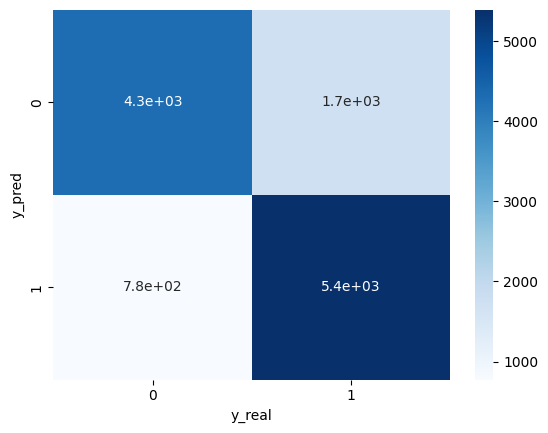

In [ ]:
y_predic_2 = modelo_hotels_2.predict(x_test)
y_predic_cat_2 = np.where(y_predic_2>0.4,1,0)

ds_validacion=pd.DataFrame(y_predic_cat_2, y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
plt.show()

In [ ]:
y_predic_cat_2

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
ds_validacion.y_pred

0        0
1        0
2        0
3        0
4        0
        ..
12198    1
12199    0
12200    0
12201    0
12202    0
Name: y_pred, Length: 12203, dtype: int64

In [ ]:
print('accuracy: ' + str(accuracy_score(ds_validacion.y_pred, ds_validacion.y_real)))
print('f1_score: ' + str(f1_score(ds_validacion.y_pred,ds_validacion.y_real)))
print('recall: '+ str(recall_score(ds_validacion.y_pred, ds_validacion.y_real)))
print('precision: '+str(precision_score(ds_validacion.y_pred,ds_validacion.y_real)))

accuracy: 0.7942309268212735
f1_score: 0.8109898381633421
recall: 0.8740872951484666
precision: 0.756388654872227


In [ ]:
x_predic = df_test[features]
sscaler=StandardScaler()
sscaler.fit(pd.DataFrame(df_test[features_without_dummies]))
x_predic_transform=sscaler.transform(pd.DataFrame(x_predic[features_without_dummies]))


In [ ]:
pd.Series(x_predic_transform[:,0])

0        1.497368
1        1.579076
2       -1.017409
3        0.762000
4        1.088830
           ...   
26530   -0.735972
26531    0.162811
26532   -0.608871
26533    0.471484
26534    0.217283
Length: 26535, dtype: float64

In [ ]:
predicciones2 = modelo_hotels_2.predict(x_predic)

830/830 [==============================] - 1s 2ms/step


In [ ]:
predicciones2 = np.where(predicciones2>0.4,1,0) #deberia dar 0 o 1 SI MAS DEL 40% EL MODELO TE DEFINE QUE CANCELA LA RESERVA

In [ ]:
df_submission = pd.DataFrame({'id':df_test['id'], 'is_canceled':predicciones2[:,0]})
df_submission.head()
df_submission.shape

(26535, 2)

In [ ]:
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_red2.csv', index=False)

In [ ]:
joblib.dump(modelo_hotels_2,'red2.pkl')

# Adam - MSE(Modelo 3) 

Cambiamos la funcion de error a el error cuadratico medio MSE

In [ ]:
# calcula la cantidad de clases
cant_clases=len(np.unique(y_train))
d_in=len(x_train.columns)

modelo_hotels_3 = keras.Sequential([
    keras.layers.Dense(1,input_shape=(d_in,)),
    keras.layers.Dense(1, activation='sigmoid')])

modelo_hotels_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 56        
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo_hotels_3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), loss='mse', metrics=[f1_m])


cant_epochs_hotels=100
modelo_hotels3_historia = modelo_hotels_3.fit(x_train,y_train,epochs=cant_epochs_hotels,batch_size=50,verbose=False)

382/382 [==============================] - 1s 2ms/step


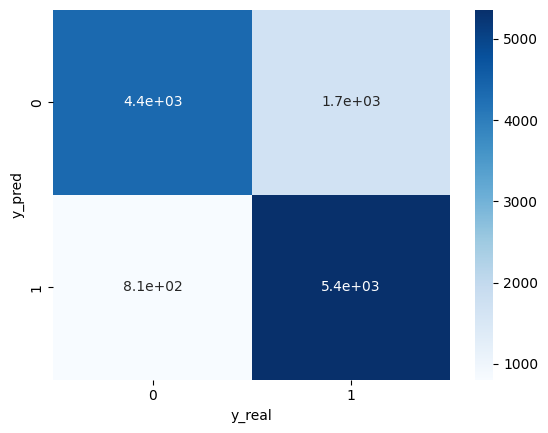

In [ ]:
y_predic_3 = modelo_hotels_3.predict(x_test)
y_predic_cat_3 = np.where(y_predic_3>0.4,1,0)

ds_validacion=pd.DataFrame(y_predic_cat_3, y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
plt.show()

In [ ]:
y_predic_cat_3

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
ds_validacion.y_pred

0        0
1        0
2        0
3        0
4        0
        ..
12198    1
12199    0
12200    0
12201    0
12202    0
Name: y_pred, Length: 12203, dtype: int64

In [ ]:
print('accuracy: ' + str(accuracy_score(ds_validacion.y_pred, ds_validacion.y_real)))
print('f1_score: ' + str(f1_score(ds_validacion.y_pred,ds_validacion.y_real)))
print('recall: '+ str(recall_score(ds_validacion.y_pred, ds_validacion.y_real)))
print('precision: '+str(precision_score(ds_validacion.y_pred,ds_validacion.y_real)))

accuracy: 0.7954601327542408
f1_score: 0.8110522331566995
recall: 0.8692195359402888
precision: 0.7601816375762736


In [ ]:
x_predic = df_test[features]
sscaler=StandardScaler()
sscaler.fit(pd.DataFrame(df_test[features_without_dummies]))
x_predic_transform=sscaler.transform(pd.DataFrame(x_predic[features_without_dummies]))


In [ ]:
pd.Series(x_predic_transform[:,0])

0        1.497368
1        1.579076
2       -1.017409
3        0.762000
4        1.088830
           ...   
26530   -0.735972
26531    0.162811
26532   -0.608871
26533    0.471484
26534    0.217283
Length: 26535, dtype: float64

In [ ]:
predicciones3 = modelo_hotels_3.predict(x_predic)

830/830 [==============================] - 1s 1ms/step


In [ ]:
predicciones3 = np.where(predicciones3>0.4,1,0) #deberia dar 0 o 1 SI MAS DEL 40% EL MODELO TE DEFINE QUE CANCELA LA RESERVA

In [ ]:
predicciones[:,0].size

26535

In [ ]:
df_submission = pd.DataFrame({'id':df_test['id'], 'is_canceled':predicciones3[:,0]})
df_submission.head()
df_submission.shape

(26535, 2)

In [ ]:
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_red3.csv', index=False)

In [ ]:
joblib.dump(modelo_hotels_3, 'modelo_redes3.csv')

['modelo_redes2.csv']

Concluimos que el f1score me da mejor usando funcion loss= 'mse' que 'binary_crossentropy'. Aunque la diferencia no es mucha, decidimos usarlo para los modelos siguientes.


# Busqueda de Hiperparametros(cant epochs, batch)

In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier   #o Sci-Keras!!!

In [ ]:
from scikeras.wrappers import KerasClassifier

In [ ]:
# Create the sklearn model for the network

def create_model():
    modelo = keras.Sequential([
    keras.layers.Dense(1,input_shape=(d_in,)),
    keras.layers.Dense(1, activation='sigmoid')])
    #PUEDE SER COSTOSO A NIVEL COMPUTACIONAL
    modelo.compile(
      optimizer=keras.optimizers.SGD(learning_rate=0.001), 
      loss='binary_crossentropy', 
      # metricas para ir calculando en cada iteracion o batch 
      metrics=[f1_m], 
    )
    
    return modelo


In [ ]:
modelo_cv = KerasClassifier(model=create_model) #GUARDAMOS TODA LA FUNCION

# Primera prueba de hiperparametros

Usamos Grid Search para optimizar cantidad de epocas y batches. Este algoritmo tiene costo computacional, dado que a diferencia de RandomSearch va evaluando cada una de las opciones.

In [ ]:
from sklearn.model_selection import GridSearchCV 

epochs = [10, 30,50]
batches = [100, 200, 500] #Mejor modelo: 0.783130 {'batch_size': 100, 'epochs': 50}

param_grid = dict( epochs=epochs, batch_size=batches)

print(param_grid)

grid = GridSearchCV(estimator=modelo_cv, param_grid=param_grid)
grid_result = grid.fit(x_train,y_train)

{'epochs': [10, 30, 50], 'batch_size': [100, 200, 500]}
Epoch 1/10
391/391 [==============================] - 1s 2ms/step - loss: 0.7157 - f1_m: 0.5508
Epoch 2/10
391/391 [==============================] - 1s 1ms/step - loss: 0.7034 - f1_m: 0.5720
Epoch 3/10
391/391 [==============================] - 1s 2ms/step - loss: 0.6935 - f1_m: 0.5992
Epoch 4/10
391/391 [==============================] - 1s 2ms/step - loss: 0.6851 - f1_m: 0.6154
Epoch 5/10
391/391 [==============================] - 1s 1ms/step - loss: 0.6774 - f1_m: 0.6289
Epoch 6/10
391/391 [==============================] - 1s 2ms/step - loss: 0.6702 - f1_m: 0.6445
Epoch 7/10
391/391 [==============================] - 1s 2ms/step - loss: 0.6630 - f1_m: 0.6583
Epoch 8/10
391/391 [==============================] - 1s 2ms/step - loss: 0.6558 - f1_m: 0.6675
Epoch 9/10
391/391 [==============================] - 1s 2ms/step - loss: 0.6484 - f1_m: 0.6775
Epoch 10/10
98/98 [==============================] - 0s 2ms/step
Epoch 1/10
391/

In [ ]:
print("Mejor modelo: %f %s" % (grid_result.best_score_, grid_result.best_params_))

NameError: ignored

Seguimos buscando mejores hiperparametros

# Segunda Busqueda de Hiperparametros

En esta seccion, nos basamos de los mejores parametros obtenidos anteriormente y decidimos agregar mas epochs(iteraciones) y darle otros valores al batch

In [ ]:
from sklearn.model_selection import GridSearchCV #QUE OPTIMICE LA CANT DE EPOCAS Y BATCHES


epochs = [50, 100]
batches = [75,100, 200]
param_grid = dict( epochs=epochs, batch_size=batches)#Mejor modelo: 0.798804 {'batch_size': 75, 'epochs': 100}

print(param_grid)

grid = GridSearchCV(estimator=modelo_cv, param_grid=param_grid)
grid_result = grid.fit(x_train,y_train)

{'epochs': [50, 100], 'batch_size': [75, 100, 200]}
Epoch 1/50
521/521 [==============================] - 4s 3ms/step - loss: 0.7894 - f1_m: 0.5216
Epoch 2/50
521/521 [==============================] - 2s 3ms/step - loss: 0.6688 - f1_m: 0.6161
Epoch 3/50
521/521 [==============================] - 2s 3ms/step - loss: 0.6077 - f1_m: 0.6709
Epoch 4/50
521/521 [==============================] - 2s 4ms/step - loss: 0.5718 - f1_m: 0.6984
Epoch 5/50
521/521 [==============================] - 2s 4ms/step - loss: 0.5482 - f1_m: 0.7169
Epoch 6/50
521/521 [==============================] - 3s 6ms/step - loss: 0.5313 - f1_m: 0.7289
Epoch 7/50
521/521 [==============================] - 3s 5ms/step - loss: 0.5184 - f1_m: 0.7375
Epoch 8/50
521/521 [==============================] - 1s 3ms/step - loss: 0.5082 - f1_m: 0.7453
Epoch 9/50
521/521 [==============================] - 2s 3ms/step - loss: 0.4997 - f1_m: 0.7514
Epoch 10/50
521/521 [==============================] - 2s 4ms/step - loss: 0.4925 - 

In [ ]:
print("Mejor modelo: %f %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor modelo: 0.798804 {'batch_size': 75, 'epochs': 100}


Con los mejores parametros obtenidos procedemos a entrenar nuestro modelo. 

## Adam

### Sigmoid(Modelo 4)

In [ ]:
# calcula la cantidad de clases
cant_clases=len(np.unique(y_train))
d_in=len(x_train.columns)

modelo_hotels_4 = keras.Sequential([
    keras.layers.Dense(1,input_shape=(d_in,)),
    keras.layers.Dense(1, activation='sigmoid')])

modelo_hotels_4.summary()

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 1)                 56        
                                                                 
 dense_111 (Dense)           (None, 1)                 2         
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo_hotels_4.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), loss='mse', metrics=[f1_m])


cant_epochs_hotels=100
modelo_hotels4_historia = modelo_hotels_4.fit(x_train,y_train,epochs=cant_epochs_hotels,batch_size=75,verbose=False)

382/382 [==============================] - 1s 2ms/step


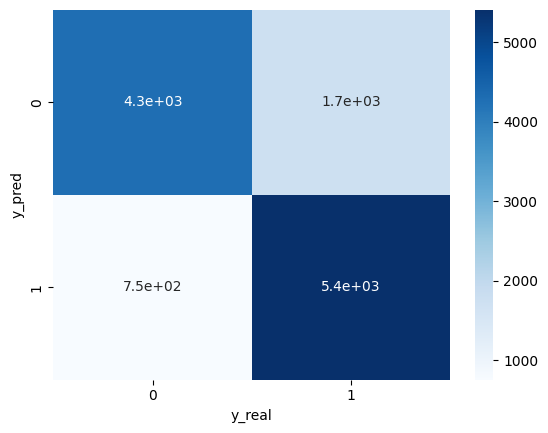

In [ ]:
y_predic_4 = modelo_hotels_4.predict(x_test)
y_predic_cat_4 = np.where(y_predic_4>0.4,1,0)

ds_validacion=pd.DataFrame(y_predic_cat_4, y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
plt.show()

In [ ]:
y_predic_cat_4

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
ds_validacion.y_pred

0        0
1        0
2        0
3        0
4        0
        ..
12198    1
12199    0
12200    0
12201    0
12202    0
Name: y_pred, Length: 12203, dtype: int64

In [ ]:
print('accuracy: ' + str(accuracy_score(ds_validacion.y_pred, ds_validacion.y_real)))
print('f1_score: ' + str(f1_score(ds_validacion.y_pred,ds_validacion.y_real)))
print('recall: '+ str(recall_score(ds_validacion.y_pred, ds_validacion.y_real)))
print('precision: '+str(precision_score(ds_validacion.y_pred,ds_validacion.y_real)))

accuracy: 0.7950503974432517
f1_score: 0.812223139875366
recall: 0.8776569852344638
precision: 0.7558692006707658


In [ ]:
x_predic = df_test[features]
sscaler=StandardScaler()
sscaler.fit(pd.DataFrame(df_test[features_without_dummies]))
x_predic_transform=sscaler.transform(pd.DataFrame(x_predic[features_without_dummies]))


In [ ]:
pd.Series(x_predic_transform[:,0])

0        1.497368
1        1.579076
2       -1.017409
3        0.762000
4        1.088830
           ...   
26530   -0.735972
26531    0.162811
26532   -0.608871
26533    0.471484
26534    0.217283
Length: 26535, dtype: float64

In [ ]:
predicciones4 = modelo_hotels_4.predict(x_predic)

830/830 [==============================] - 1s 1ms/step


In [ ]:
predicciones4[:,0].size

26535

In [ ]:
predicciones4 = np.where(predicciones4>0.4,1,0) #deberia dar 0 o 1 SI MAS DEL 40% EL MODELO TE DEFINE QUE CANCELA LA RESERVA

In [ ]:
predicciones4[:,0].size

26535

In [ ]:
df_submission = pd.DataFrame({'id':df_test['id'], 'is_canceled':predicciones4[:,0]})
df_submission.head()
df_submission.shape

(26535, 2)

In [ ]:
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_red4.csv', index=False)

In [ ]:
joblib.dump(modelo_hotels_4, 'red4_grid.pkl')

['red4_grid.csv']

### Relu

#### 2 capas ocultas( Modelo 5)

In [ ]:
# calcula la cantidad de clases
cant_clases=len(np.unique(y_train))
d_in=len(x_train.columns)
d_out = 1

modelo_hotels_5 = keras.Sequential([
    keras.layers.Dense(1,input_shape=(d_in,), activation="relu"),
    keras.layers.Dense(2, activation='relu'), # 2 capas ocultas 
    keras.layers.Dense(d_out, )])

modelo_hotels_5.summary()

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 1)                 56        
                                                                 
 dense_115 (Dense)           (None, 2)                 4         
                                                                 
 dense_116 (Dense)           (None, 1)                 3         
                                                                 
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo_hotels_5.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), loss='mse', metrics=[f1_m])


cant_epochs_hotels=100
modelo_hotels5_historia = modelo_hotels_5.fit(x_train,y_train,epochs=cant_epochs_hotels,batch_size=75,verbose=False)

382/382 [==============================] - 1s 2ms/step


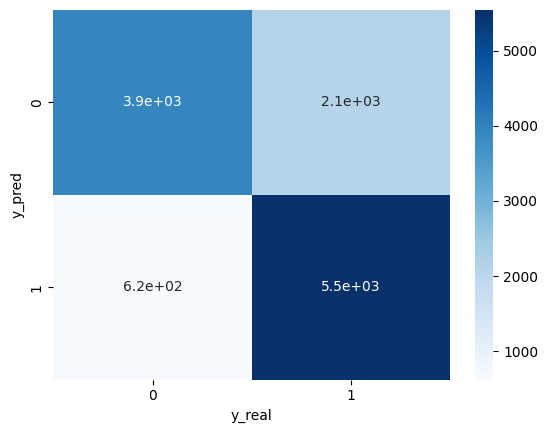

In [ ]:
y_predic_5 = modelo_hotels_5.predict(x_test)
y_predic_cat_5 = np.where(y_predic_5>0.4,1,0)

ds_validacion=pd.DataFrame(y_predic_cat_5, y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
plt.show()

In [ ]:
y_predic_cat_5

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
ds_validacion.y_pred

0        0
1        0
2        0
3        0
4        0
        ..
12198    1
12199    0
12200    0
12201    0
12202    0
Name: y_pred, Length: 12203, dtype: int64

In [ ]:
print('accuracy: ' + str(accuracy_score(ds_validacion.y_pred, ds_validacion.y_real)))
print('f1_score: ' + str(f1_score(ds_validacion.y_pred,ds_validacion.y_real)))
print('recall: '+ str(recall_score(ds_validacion.y_pred, ds_validacion.y_real)))
print('precision: '+str(precision_score(ds_validacion.y_pred,ds_validacion.y_real)))

accuracy: 0.77669425551094
f1_score: 0.8026649286697082
recall: 0.8992373843907188
precision: 0.7248234370912896


In [ ]:
x_predic = df_test[features]
sscaler=StandardScaler()
sscaler.fit(pd.DataFrame(df_test[features_without_dummies]))
x_predic_transform=sscaler.transform(pd.DataFrame(x_predic[features_without_dummies]))


In [ ]:
pd.Series(x_predic_transform[:,0])

0        1.497368
1        1.579076
2       -1.017409
3        0.762000
4        1.088830
           ...   
26530   -0.735972
26531    0.162811
26532   -0.608871
26533    0.471484
26534    0.217283
Length: 26535, dtype: float64

In [ ]:
predicciones5 = modelo_hotels_5.predict(x_predic)

830/830 [==============================] - 1s 2ms/step


In [ ]:
predicciones5[:,0].size

26535

In [ ]:
predicciones5 = np.where(predicciones5>0.4,1,0) #deberia dar 0 o 1 SI MAS DEL 40% EL MODELO TE DEFINE QUE CANCELA LA RESERVA

In [ ]:
predicciones5[:,0].size

26535

In [ ]:
df_submission = pd.DataFrame({'id':df_test['id'], 'is_canceled':predicciones5[:,0]})
df_submission.head()
df_submission.shape

(26535, 2)

In [ ]:
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_red5.csv', index=False)

In [ ]:
joblib.dump(modelo_hotels_5, 'red5_grid.csv')

['red5_grid.csv']

#### 32 capas ocultas, Early Stopping (Modelo 6)


Decido aumentar la cantidad de capas ocultas, dado que me parece un buen numero entre la cantidad de entradas y salida

In [ ]:
# calcula la cantidad de clases
cant_clases=len(np.unique(y_train))
d_in=len(x_train.columns)
d_out = 1

modelo_hotels_6 = keras.Sequential([
    keras.layers.Dense(1,input_shape=(d_in,), activation="relu"),
    keras.layers.Dense(32, activation='relu'), # 2 capas ocultas 
    keras.layers.Dense(d_out, ),
    ]
    )

modelo_hotels_6.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 1)                 56        
                                                                 
 dense_121 (Dense)           (None, 32)                64        
                                                                 
 dense_122 (Dense)           (None, 1)                 33        
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo_hotels_6.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), loss='mse', metrics=[f1_m])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

cant_epochs_hotels=100
modelo_hotels6_historia = modelo_hotels_6.fit(x_train,y_train,epochs=cant_epochs_hotels,batch_size=75,callbacks=[callback],verbose=False)

382/382 [==============================] - 1s 2ms/step


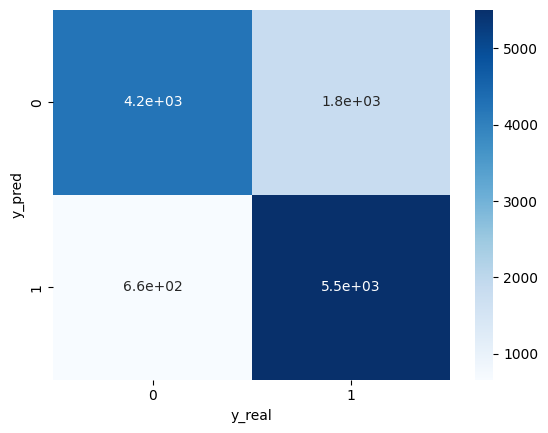

In [ ]:
y_predic_6 = modelo_hotels_6.predict(x_test)
y_predic_cat_6 = np.where(y_predic_6>0.4,1,0)

ds_validacion=pd.DataFrame(y_predic_cat_6, y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
plt.show()

In [ ]:
y_predic_cat_6

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
ds_validacion.y_pred

0        0
1        0
2        0
3        0
4        0
        ..
12198    1
12199    0
12200    0
12201    0
12202    0
Name: y_pred, Length: 12203, dtype: int64

In [ ]:
print('accuracy: ' + str(accuracy_score(ds_validacion.y_pred, ds_validacion.y_real)))
print('f1_score: ' + str(f1_score(ds_validacion.y_pred,ds_validacion.y_real)))
print('recall: '+ str(recall_score(ds_validacion.y_pred, ds_validacion.y_real)))
print('precision: '+str(precision_score(ds_validacion.y_pred,ds_validacion.y_real)))

accuracy: 0.7967712857494059
f1_score: 0.816051031004302
recall: 0.8925847801395425
precision: 0.7516054105752152


In [ ]:
x_predic = df_test[features]
sscaler=StandardScaler()
sscaler.fit(pd.DataFrame(df_test[features_without_dummies]))
x_predic_transform=sscaler.transform(pd.DataFrame(x_predic[features_without_dummies]))


In [ ]:
pd.Series(x_predic_transform[:,0])

0        1.497368
1        1.579076
2       -1.017409
3        0.762000
4        1.088830
           ...   
26530   -0.735972
26531    0.162811
26532   -0.608871
26533    0.471484
26534    0.217283
Length: 26535, dtype: float64

In [ ]:
predicciones6 = modelo_hotels_6.predict(x_predic)

830/830 [==============================] - 3s 3ms/step


In [ ]:
predicciones6[:,0].size

26535

In [ ]:
predicciones6 = np.where(predicciones6>0.4,1,0) #deberia dar 0 o 1 SI MAS DEL 40% EL MODELO TE DEFINE QUE CANCELA LA RESERVA

In [ ]:
predicciones6[:,0].size

26535

In [ ]:
df_submission = pd.DataFrame({'id':df_test['id'], 'is_canceled':predicciones6[:,0]})
df_submission.head()
df_submission.shape

(26535, 2)

In [ ]:
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_red6.csv', index=False)

In [ ]:
joblib.dump(modelo_hotels_6, 'red6_grid.pkl')

['red6_grid.csv']

### Sigmoid + Relu

#### 32 capas ocultas, Early Stopping(Modelo 7)

*   Elemento de lista
*   Elemento de lista



In [ ]:
# calcula la cantidad de clases
cant_clases=len(np.unique(y_train))
d_in=len(x_train.columns)
d_out = 1

modelo_hotels_7 = keras.Sequential([
    keras.layers.Dense(1,input_shape=(d_in,), activation="sigmoid"),
    keras.layers.Dense(32, activation='relu'), # 2 capas ocultas 
    keras.layers.Dense(d_out, ),
    ]
    )

modelo_hotels_7.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_135 (Dense)           (None, 1)                 56        
                                                                 
 dense_136 (Dense)           (None, 32)                64        
                                                                 
 dense_137 (Dense)           (None, 1)                 33        
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo_hotels_7.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), loss='mse', metrics=[f1_m])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

cant_epochs_hotels=100
modelo_hotels7_historia = modelo_hotels_7.fit(x_train,y_train,epochs=cant_epochs_hotels,batch_size=75,callbacks=[callback],verbose=False)

382/382 [==============================] - 1s 1ms/step


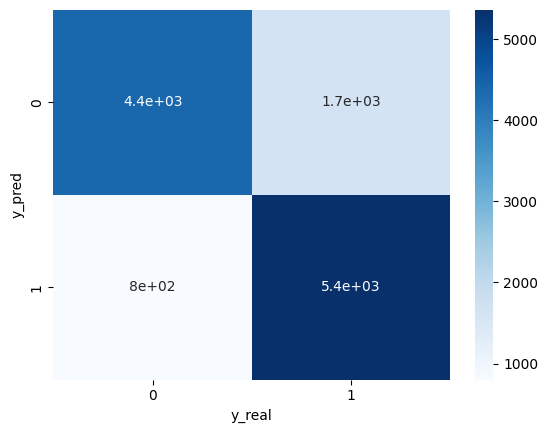

In [ ]:
y_predic_7 = modelo_hotels_7.predict(x_test)
y_predic_cat_7 = np.where(y_predic_7>0.4,1,0)

ds_validacion=pd.DataFrame(y_predic_cat_7, y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
plt.show()

In [ ]:
y_predic_cat_7

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
ds_validacion.y_pred

0        0
1        0
2        0
3        0
4        0
        ..
12198    1
12199    0
12200    0
12201    0
12202    0
Name: y_pred, Length: 12203, dtype: int64

In [ ]:
print('accuracy: ' + str(accuracy_score(ds_validacion.y_pred, ds_validacion.y_real)))
print('f1_score: ' + str(f1_score(ds_validacion.y_pred,ds_validacion.y_real)))
print('recall: '+ str(recall_score(ds_validacion.y_pred, ds_validacion.y_real)))
print('precision: '+str(precision_score(ds_validacion.y_pred,ds_validacion.y_real)))

accuracy: 0.7987380152421536
f1_score: 0.8136004857316332
recall: 0.8697063118611066
precision: 0.7642948809354057


In [ ]:
x_predic = df_test[features]
sscaler=StandardScaler()
sscaler.fit(pd.DataFrame(df_test[features_without_dummies]))
x_predic_transform=sscaler.transform(pd.DataFrame(x_predic[features_without_dummies]))


In [ ]:
pd.Series(x_predic_transform[:,0])

0        1.497368
1        1.579076
2       -1.017409
3        0.762000
4        1.088830
           ...   
26530   -0.735972
26531    0.162811
26532   -0.608871
26533    0.471484
26534    0.217283
Length: 26535, dtype: float64

In [ ]:
predicciones7 = modelo_hotels_7.predict(x_predic)

830/830 [==============================] - 1s 1ms/step


In [ ]:
predicciones7[:,0].size

26535

In [ ]:
predicciones7 = np.where(predicciones7>0.4,1,0) #deberia dar 0 o 1 SI MAS DEL 40% EL MODELO TE DEFINE QUE CANCELA LA RESERVA

In [ ]:
predicciones7[:,0].size

26535

In [ ]:
df_submission = pd.DataFrame({'id':df_test['id'], 'is_canceled':predicciones7[:,0]})
df_submission.head()
df_submission.shape

(26535, 2)

In [ ]:
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_red7.csv', index=False)

In [ ]:
joblib.dump(modelo_hotels_7, 'red7_grid.pkl')

['red7_grid.pkl']

Concluimos que de los modelos entrenados con los mejores hiperpametros hallados por GridSearch. El mejor basado en el mejor f1 score fue el modeo 6. Este usa funcion de activacion Relu.

## Nadam


### Relu

#### 32 capas ocultas, Early Stopping(Modelo 8)

In [ ]:
# calcula la cantidad de clases
cant_clases=len(np.unique(y_train))
d_in=len(x_train.columns)
d_out = 1

modelo_hotels_8 = keras.Sequential([
    keras.layers.Dense(1,input_shape=(d_in,), activation="relu"),
    keras.layers.Dense(32, activation='relu'), # 2 capas ocultas 
    keras.layers.Dense(d_out, ),
    ]
    )

modelo_hotels_8.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 1)                 56        
                                                                 
 dense_133 (Dense)           (None, 32)                64        
                                                                 
 dense_134 (Dense)           (None, 1)                 33        
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo_hotels_8.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07), loss='mse', metrics=[f1_m])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

cant_epochs_hotels=100
modelo_hotels8_historia = modelo_hotels_8.fit(x_train,y_train,epochs=cant_epochs_hotels,batch_size=75,callbacks=[callback],verbose=False)

382/382 [==============================] - 1s 1ms/step


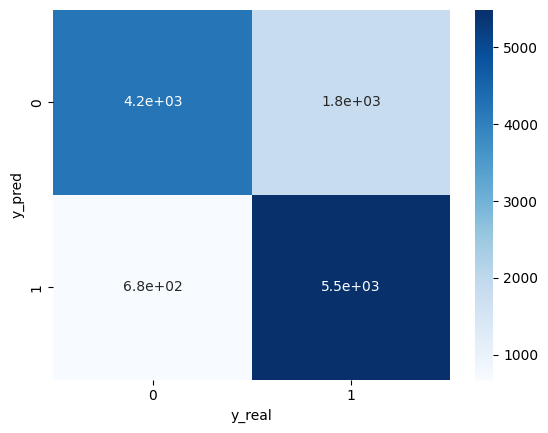

In [ ]:
y_predic_8 = modelo_hotels_8.predict(x_test)
y_predic_cat_8 = np.where(y_predic_8>0.4,1,0)

ds_validacion=pd.DataFrame(y_predic_cat_8, y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
plt.show()

In [ ]:
y_predic_cat_8

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
ds_validacion.y_pred

0        0
1        0
2        0
3        0
4        0
        ..
12198    1
12199    0
12200    0
12201    0
12202    0
Name: y_pred, Length: 12203, dtype: int64

In [ ]:
print('accuracy: ' + str(accuracy_score(ds_validacion.y_pred, ds_validacion.y_real)))
print('f1_score: ' + str(f1_score(ds_validacion.y_pred,ds_validacion.y_real)))
print('recall: '+ str(recall_score(ds_validacion.y_pred, ds_validacion.y_real)))
print('precision: '+str(precision_score(ds_validacion.y_pred,ds_validacion.y_real)))

accuracy: 0.7936572973858887
f1_score: 0.8133985475025938
recall: 0.8904754178159987
precision: 0.7486018278543173


In [ ]:
x_predic = df_test[features]
sscaler=StandardScaler()
sscaler.fit(pd.DataFrame(df_test[features_without_dummies]))
x_predic_transform=sscaler.transform(pd.DataFrame(x_predic[features_without_dummies]))


In [ ]:
pd.Series(x_predic_transform[:,0])

0        1.497368
1        1.579076
2       -1.017409
3        0.762000
4        1.088830
           ...   
26530   -0.735972
26531    0.162811
26532   -0.608871
26533    0.471484
26534    0.217283
Length: 26535, dtype: float64

In [ ]:
predicciones8 = modelo_hotels_8.predict(x_predic)

830/830 [==============================] - 1s 2ms/step


In [ ]:
predicciones8[:,0].size

26535

In [ ]:
predicciones8 = np.where(predicciones8>0.4,1,0) #deberia dar 0 o 1 SI MAS DEL 40% EL MODELO TE DEFINE QUE CANCELA LA RESERVA

In [ ]:
predicciones8[:,0].size

26535

In [ ]:
df_submission = pd.DataFrame({'id':df_test['id'], 'is_canceled':predicciones8[:,0]})
df_submission.head()
df_submission.shape

(26535, 2)

In [ ]:
df_submission.to_csv('/content/drive/MyDrive/submissions/submission_red8.csv', index=False)

In [ ]:
joblib.dump(modelo_hotels_8, 'red8_grid.pkl')

['red8_grid.pkl']